# 1. FILTRANDO Y ARREGLANDO DATAFRAMES

El data set principal tengo que dividirlo en los siguientes data frames:
- Valor (en millones de dólares)
- Valor ajustado (teniendo en cuenta la inflación)
- Unidades

In [1]:
# importo las librerías necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
music_all = pd.read_csv('Music Sales/musicdata.csv')
music_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             3008 non-null   object 
 1   metric             3008 non-null   object 
 2   year               3008 non-null   int64  
 3   number_of_records  3008 non-null   int64  
 4   value_actual       1351 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 117.6+ KB


In [3]:
# elimino todos los Nan ya que son formatos que no existían en el año:

music_all.dropna(inplace=True)
music_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 10 to 3007
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             1351 non-null   object 
 1   metric             1351 non-null   object 
 2   year               1351 non-null   int64  
 3   number_of_records  1351 non-null   int64  
 4   value_actual       1351 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 63.3+ KB


In [5]:
music_all.head()

,format,metric,year,number_of_records,value_actual
10,CD,Units,1983,1,0.8
11,CD,Units,1984,1,5.8
12,CD,Units,1985,1,22.6
13,CD,Units,1986,1,53.0
14,CD,Units,1987,1,102.1


In [4]:
music_all['metric'].unique()

array(['Units', 'Value', 'Value (Adjusted)'], dtype=object)

Existe una columna llamada *metric* que contiene los parámetros:
- Units
- Value
- Value (Adjusted)

A partir de esta columna necesito crear los siguientes dataframes:

**1.1 Music Revenues** (music_revenues)
Este dataframe agrupará todas las filas que tengas en *metric* el valor de 'Value (Adjusted)', que es el ingreso teniendo en cuenta la inflación (revenues).

**1.2. Music Values** (music_values)
Dataframe con todos los valores de ingresos sin tener en cuenta la inflación.

**1.3. Music Units** (music_units)
Y este dataframe, agrupará los que tengan en *metric* el valor de 'Units' que son las unidades vendidas.


### 1.1 Music Revenues

In [5]:
# Se podría haber hecho con la función de melt, pero ya lo tenía declarado así:

# función para quedarme sólo con los valores de 'Value Adjusted'

def value_adjusted(metric):
    if metric == 'Value (Adjusted)':
        return int(1)
    
# creo una columna en dónde se añadirá '1' a los que cumplan con la función:

music_all['value_adjusted'] = music_all['metric'].apply(value_adjusted)
music_all['value_adjusted'].unique()

array([nan,  1.])

In [6]:
music_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 10 to 3007
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             1351 non-null   object 
 1   metric             1351 non-null   object 
 2   year               1351 non-null   int64  
 3   number_of_records  1351 non-null   int64  
 4   value_actual       1351 non-null   float64
 5   value_adjusted     436 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 73.9+ KB


In [7]:
# ahora, me creo una copia del dataframe en dónde eliminaré los nan's:

music_revenues = music_all.copy()

In [8]:
music_revenues.dropna(inplace=True)

In [9]:
music_revenues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 1927 to 3007
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             436 non-null    object 
 1   metric             436 non-null    object 
 2   year               436 non-null    int64  
 3   number_of_records  436 non-null    int64  
 4   value_actual       436 non-null    float64
 5   value_adjusted     436 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 23.8+ KB


In [10]:
''' Aquí tengo ya un nuevo dataframe sólo con 'Value (Adjusted)'
    en dónde puedo elimnar las columnas que no me interesan '''

music_revenues.drop(['metric'], axis=1, inplace=True)
music_revenues.drop(['value_adjusted'], axis=1, inplace=True)
music_revenues.head()

,format,year,number_of_records,value_actual
1927,8 - Track,1973,1,2815.681824
1928,8 - Track,1974,1,2848.008609
1929,8 - Track,1975,1,2770.409498
1930,8 - Track,1976,1,3047.215772
1931,8 - Track,1977,1,3421.416287


In [11]:
# tengo que reiniciar el index para tener mejor visualización:

music_revenues.reset_index(inplace=True)
music_revenues.head()

,index,format,year,number_of_records,value_actual
0,1927,8 - Track,1973,1,2815.681824
1,1928,8 - Track,1974,1,2848.008609
2,1929,8 - Track,1975,1,2770.409498
3,1930,8 - Track,1976,1,3047.215772
4,1931,8 - Track,1977,1,3421.416287


In [12]:
# y eliminar la columna 'index' que me creó:
music_revenues.drop(['index'], inplace=True, axis=1)
music_revenues.head()

,format,year,number_of_records,value_actual
0,8 - Track,1973,1,2815.681824
1,8 - Track,1974,1,2848.008609
2,8 - Track,1975,1,2770.409498
3,8 - Track,1976,1,3047.215772
4,8 - Track,1977,1,3421.416287


### Creando Columnas

Una vez tengo el dataframe con los datos que me interesan, debo también crear las siguientes columnas:
- Category: En dónde diferenciaré por categorías de formatos.
- Type: En dónde podré especificar el tipo 'Digital' o 'Physical'.

### Función para crear columna de 'Category'

In [13]:
# Función para agrupar por categorías:
''' El código está puesto largo ya que no me dejaba hacer
    ENTER para tenerlo más organizado '''

def categoria(formato):
    # formatos 'physical'
    if formato == '8 - Track' or formato == 'Cassette' or formato == 'Cassette Single' or formato == 'Other Tapes':
        return 'Cassettes & Tapes'
    
    elif formato == 'CD' or formato == 'CD Single' or formato == 'SACD':
        return 'CD & Singles'
    
    elif formato == 'DVD Audio' or formato == 'Music Video (Physical)':
        return 'DVDs'
    
    elif formato == 'LP/EP' or formato == 'Vinyl Single':
        return 'Vinyl'             
    
    # formatos 'digital'
    elif formato == 'Download Album' or formato == 'Download Music Video' or formato == 'Download Single':
        return 'Downloads'
    
    elif formato == 'Limited Tier Paid Subscription':
        return 'Limited Subscriptions'
    
    elif formato == 'On-Demand Streaming (Ad-Supported)' or formato == 'Other Ad-Supported Streaming':
        return 'Ad-Supported Streaming'

    elif formato == 'Other Digital' or formato == 'Synchronization':
        return 'License (YouTube)'
    
    elif formato == 'Paid Subscriptions' or 'Paid Subscription':
        return 'Streaming Subscriptions'
    
    elif formato == 'Ringtones & Ringbacks' or formato == 'Kiosk':
        return 'Ringtones & Kiosk'
    
    elif formato == 'SoundExchange Distributions':
        return 'SoundExchange'


In [14]:
# Añado columna con la función creada:

music_revenues['category'] = music_revenues['format'].apply(categoria)
music_revenues.head()

,format,year,number_of_records,value_actual,category
0,8 - Track,1973,1,2815.681824,Cassettes & Tapes
1,8 - Track,1974,1,2848.008609,Cassettes & Tapes
2,8 - Track,1975,1,2770.409498,Cassettes & Tapes
3,8 - Track,1976,1,3047.215772,Cassettes & Tapes
4,8 - Track,1977,1,3421.416287,Cassettes & Tapes


### Función para crear columna de 'Type'

In [15]:
# Creo función para la columna 'Type':

def digital_physical(formato):
    if formato == '8 - Track':
        return 'Physical'
    elif formato == 'CD':
        return 'Physical'
    elif formato == 'CD Single':
        return 'Physical'
    elif formato == 'Cassette':
        return 'Physical'
    elif formato == 'Cassette Single':
        return 'Physical'        
    elif formato == 'DVD Audio':
        return 'Physical'
    elif formato == 'LP/EP':
        return 'Physical'
    elif formato == 'Music Video (Physical)':
        return 'Physical'        
    elif formato == 'Other Tapes':
        return 'Physical'
    elif formato == 'SACD':
        return 'Physical'        
    elif formato == 'Vinyl Single':
        return 'Physical'
    
    elif formato == 'Download Album':
        return 'Digital'        
    elif formato == 'Download Music Video':
        return 'Digital'
    elif formato == 'Download Single':
        return 'Digital'
    elif formato == 'Kiosk':
        return 'Digital'        
    elif formato == 'Limited Tier Paid Subscription':
        return 'Digital'
    elif formato == 'On-Demand Streaming (Ad-Supported)':
        return 'Digital'
    elif formato == 'Other Ad-Supported Streaming':
        return 'Digital'
    elif formato == 'Other Digital':
        return 'Digital'
    elif formato == 'Paid Subscriptions' or 'Paid Subscription':
        return 'Digital'
    elif formato == 'Ringtones & Ringbacks':
        return 'Digital'        
    elif formato == 'SoundExchange Distributions':
        return 'Digital'
    elif formato == 'Synchronization':
        return 'Digital'


In [16]:
# añado la columna de 'type', aplicando la función de 'digital_physical':

music_revenues['type'] = music_revenues['format'].apply(digital_physical)
music_revenues.head(-20)

,format,year,number_of_records,value_actual,category,type
0,8 - Track,1973,1,2815.681824,Cassettes & Tapes,Physical
1,8 - Track,1974,1,2848.008609,Cassettes & Tapes,Physical
2,8 - Track,1975,1,2770.409498,Cassettes & Tapes,Physical
3,8 - Track,1976,1,3047.215772,Cassettes & Tapes,Physical
4,8 - Track,1977,1,3421.416287,Cassettes & Tapes,Physical
...,...,...,...,...,...,...
411,Vinyl Single,1995,1,78.341089,Vinyl,Physical
412,Vinyl Single,1996,1,77.397753,Vinyl,Physical
413,Vinyl Single,1997,1,56.706475,Vinyl,Physical
414,Vinyl Single,1998,1,40.309110,Vinyl,Physical


In [19]:
''' Me interesa ordenar los formatos según el 'type' para que en los
    gráficos, sea más fácil entender la leyenda y los colores vayan
    de acuerdo a physical y digital'''

music_revenues.sort_values(by='type', inplace=True, ascending=False)

## 1.2. Music Values

**PARA UN MEJOR ENTENDIMIENTO, HACEMOS UN DATAFRAME CON EL VALOR REAL SIN TENER EN CUENTA LA INFLACIÓN**

In [20]:
music_values = music_all.copy()

In [21]:
def value(metric):
    if metric == 'Value':
        return int(1)
    
# creo una columna en dónde se añadirá '1' a los que cumplan con la función:

music_values['value'] = music_all['metric'].apply(value)
music_values['value'].unique()

array([nan,  1.])

In [22]:
music_values.head()

,format,metric,year,number_of_records,value_actual,value_adjusted,value
10,CD,Units,1983,1,0.8,NaN,NaN
11,CD,Units,1984,1,5.8,NaN,NaN
12,CD,Units,1985,1,22.6,NaN,NaN
13,CD,Units,1986,1,53.0,NaN,NaN
14,CD,Units,1987,1,102.1,NaN,NaN


In [23]:
music_values.drop(['value_adjusted'], axis=1, inplace=True)

In [24]:
music_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 10 to 3007
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             1351 non-null   object 
 1   metric             1351 non-null   object 
 2   year               1351 non-null   int64  
 3   number_of_records  1351 non-null   int64  
 4   value_actual       1351 non-null   float64
 5   value              437 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 73.9+ KB


In [25]:
music_values.dropna(inplace=True)

In [26]:
music_values.drop(['value'], axis=1, inplace=True)
music_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 856 to 1926
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             437 non-null    object 
 1   metric             437 non-null    object 
 2   year               437 non-null    int64  
 3   number_of_records  437 non-null    int64  
 4   value_actual       437 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 20.5+ KB


### APLICAMOS FUNCIONES CREADAS ANTERIORMENTE.

In [27]:
music_values['category'] = music_values['format'].apply(categoria)
music_values['type'] = music_values['format'].apply(digital_physical)

In [28]:
music_values.head()

,format,metric,year,number_of_records,value_actual,category,type
856,CD,Value,1983,1,17.2,CD & Singles,Physical
857,CD,Value,1984,1,103.3,CD & Singles,Physical
858,CD,Value,1985,1,389.5,CD & Singles,Physical
859,CD,Value,1986,1,930.1,CD & Singles,Physical
860,CD,Value,1987,1,1593.6,CD & Singles,Physical


In [29]:
music_values.reset_index(inplace=True)

In [30]:
music_values.drop(['index'], axis=1, inplace=True)
music_values.head()

,format,metric,year,number_of_records,value_actual,category,type
0,CD,Value,1983,1,17.2,CD & Singles,Physical
1,CD,Value,1984,1,103.3,CD & Singles,Physical
2,CD,Value,1985,1,389.5,CD & Singles,Physical
3,CD,Value,1986,1,930.1,CD & Singles,Physical
4,CD,Value,1987,1,1593.6,CD & Singles,Physical


In [88]:
music_values['category'].unique()

array(['CD & Singles', 'Cassettes & Tapes', 'DVDs', 'Downloads',
       'Streaming Subscriptions', 'Vinyl', 'Limited Subscriptions',
       'Ad-Supported Streaming', 'License (YouTube)'], dtype=object)

## 1.3. Music Units

In [72]:
# el mismo proceso que hice para el dataframe anterior:

music_units = music_all.copy()
music_units.head()

,format,metric,year,number_of_records,value_actual,value_adjusted
10,CD,Units,1983,1,0.8,NaN
11,CD,Units,1984,1,5.8,NaN
12,CD,Units,1985,1,22.6,NaN
13,CD,Units,1986,1,53.0,NaN
14,CD,Units,1987,1,102.1,NaN


In [73]:
# función para quedarme sólo con los valores de 'Units'

def value_units(metric):
    if metric == 'Units':
        return int(1)
    
# creo una columna en dónde se añadirá '1' a los que cumplan con la función:

music_units['units'] = music_units['metric'].apply(value_units)
music_units['units'].unique()

array([ 1., nan])

In [74]:
music_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 10 to 3007
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             1351 non-null   object 
 1   metric             1351 non-null   object 
 2   year               1351 non-null   int64  
 3   number_of_records  1351 non-null   int64  
 4   value_actual       1351 non-null   float64
 5   value_adjusted     436 non-null    float64
 6   units              478 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 84.4+ KB


In [75]:
# elimino columna de 'value adjusted', 'metric', y luego elimino los Nans.

music_units.drop(['metric'], axis=1, inplace=True)
music_units.drop(['value_adjusted'], axis=1, inplace=True)

In [76]:
music_units.dropna(inplace=True)
music_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 10 to 844
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             478 non-null    object 
 1   year               478 non-null    int64  
 2   number_of_records  478 non-null    int64  
 3   value_actual       478 non-null    float64
 4   units              478 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 22.4+ KB


In [77]:
# puedo también eliminar la columna de 'units', ya que sólo me servía para el filtrado:
music_units.drop(['units'], axis=1, inplace=True)

In [78]:
# finalmente, a este dataframe, quiero cambiar el nombre de la columna value_actual:

music_units.rename({'value_actual':'value_units'}, axis=1, inplace=True)
music_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 10 to 844
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             478 non-null    object 
 1   year               478 non-null    int64  
 2   number_of_records  478 non-null    int64  
 3   value_units        478 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 18.7+ KB


In [83]:
''' Y ahora el mismo proceso para añadir las columnas de 'category' y 'type'
    utilizando las funciones creadas previamente. '''

music_units['category'] = music_units['format'].apply(categoria)
music_units['type'] = music_units['format'].apply(digital_physical)
music_units.head()

,format,year,number_of_records,value_units,category,type
0,CD,1983,1,0.8,CD & Singles,Physical
1,CD,1984,1,5.8,CD & Singles,Physical
2,CD,1985,1,22.6,CD & Singles,Physical
3,CD,1986,1,53.0,CD & Singles,Physical
4,CD,1987,1,102.1,CD & Singles,Physical


In [84]:
# reestablezco el index:
music_units.reset_index(inplace=True)
music_units.head()

,index,format,year,number_of_records,value_units,category,type
0,0,CD,1983,1,0.8,CD & Singles,Physical
1,1,CD,1984,1,5.8,CD & Singles,Physical
2,2,CD,1985,1,22.6,CD & Singles,Physical
3,3,CD,1986,1,53.0,CD & Singles,Physical
4,4,CD,1987,1,102.1,CD & Singles,Physical


In [85]:
music_units.drop(['index'], inplace=True, axis=1)

In [61]:
music_units.head()

,format,year,number_of_records,value_units,category,type
0,CD,1983,1,0.8,CD & Singles,Physical
1,CD,1984,1,5.8,CD & Singles,Physical
2,CD,1985,1,22.6,CD & Singles,Physical
3,CD,1986,1,53.0,CD & Singles,Physical
4,CD,1987,1,102.1,CD & Singles,Physical


In [86]:
music_units['format'].unique()

array(['CD', 'CD Single', 'Cassette', 'Cassette Single', 'LP/EP',
       'Vinyl Single', '8 - Track', 'Other Tapes',
       'Music Video (Physical)', 'DVD Audio', 'SACD', 'Download Single',
       'Download Album', 'Kiosk', 'Download Music Video',
       'Ringtones & Ringbacks', 'Paid Subscriptions'], dtype=object)

In [87]:
music_units['category'].unique()

array(['CD & Singles', 'Cassettes & Tapes', 'Vinyl', 'DVDs', 'Downloads',
       'Streaming Subscriptions'], dtype=object)

### HABIENDO CREANDO LOS 3 DATASETS POR SEPARADO, PUEDO EMPEZAR A HACER LOS GRÁFICOS QUE ME INTERESAN DE ESTOS DATOS.

# 2. GRÁFICOS

Para los gráficos, seguiré este orden:

**2.1 Dataframe de Music Values vs. Music Revenues**

**2.2 Dataframe de Music Units**

### 2.1 Music Values vs. Music Revenues

Gráfico de ingresos (sin inflación) por categorías:

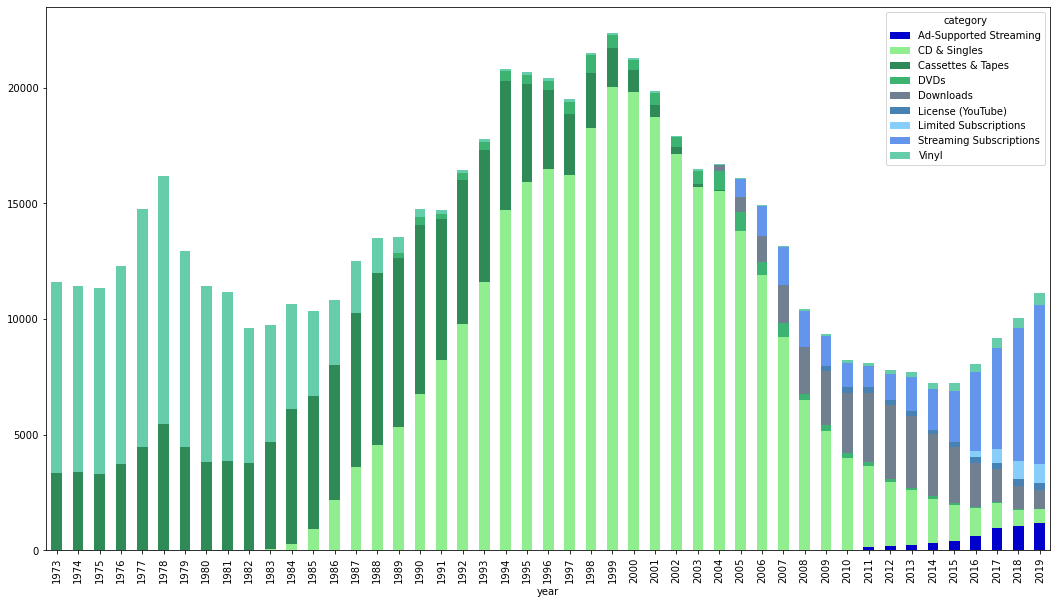

In [49]:
# me creo un dataframe agrupado por categorías x año:
# y hago una suma del valor real para representarlo.

values_group = music_revenues.groupby(['year', 'category'])['value_actual'].sum().unstack('category').fillna(0)
from matplotlib import cm
from itertools import cycle, islice

colors = list(islice(cycle(['#0000CD', '#90EE90', '#2E8B57', '#3CB371', '#708090', '#4682B4', 
             '#87CEFA', '#6495ED', '#66CDAA']), None, len(values_group)))

values_group.plot(kind='bar', stacked=True, 
          color=colors, figsize=(18,10));

Gráfico de ingresos con el valor ajustado, por categorías:

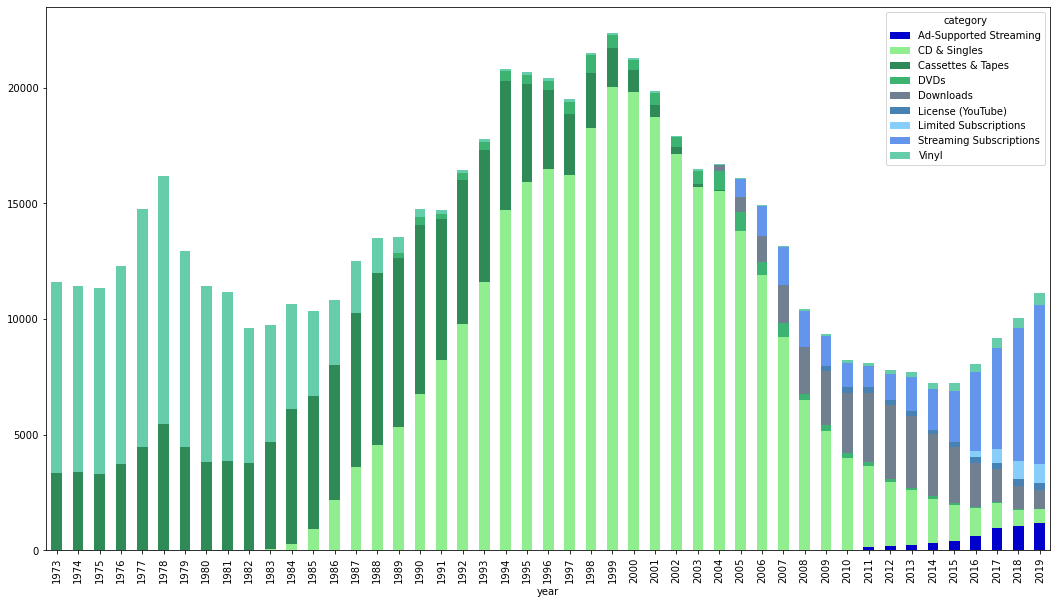

In [46]:
# me creo un dataframe agrupado por categorías x año:
# y hago una suma del valor total para representarlo.

revenues_group = music_revenues.groupby(['year', 'category'])['value_actual'].sum().unstack('category').fillna(0)
from matplotlib import cm
from itertools import cycle, islice

colors = list(islice(cycle(['#0000CD', '#90EE90', '#2E8B57', '#3CB371', '#708090', '#4682B4', 
             '#87CEFA', '#6495ED', '#66CDAA']), None, len(revenues_group)))

revenues_group.plot(kind='bar', stacked=True, 
          color=colors, figsize=(18,10));

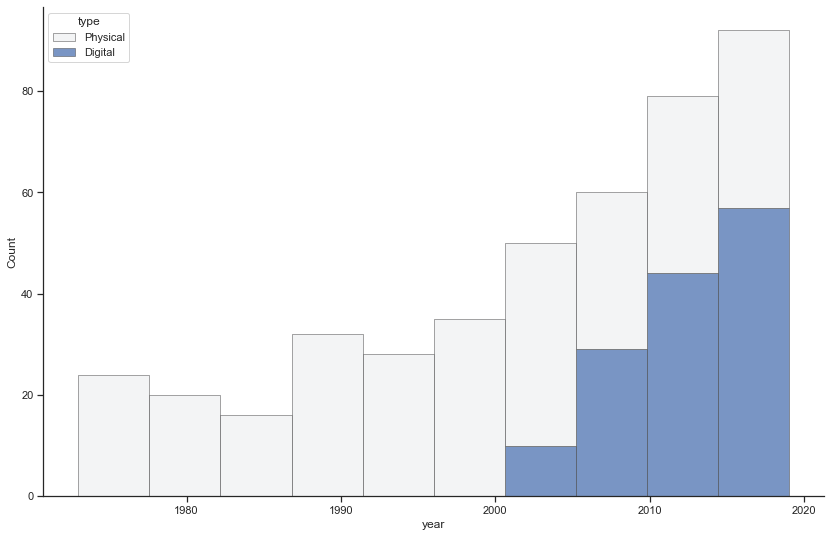

In [158]:
# representación visual de los formatos Physical y Digital:

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(14, 9))
sns.despine(f)

sns.histplot(
    data=music_revenues,
    x="year", hue="type",
    multiple="stack",
    palette="light:b",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
);

### 2.2 Music Units

En cuanto a las unidades vendidas de vinilos, quiero crear los siguientes gráficos:
- Gráfico stacked bar agrupado por categorías
- Gráfico por variable Digital y Physical de manera lineal.

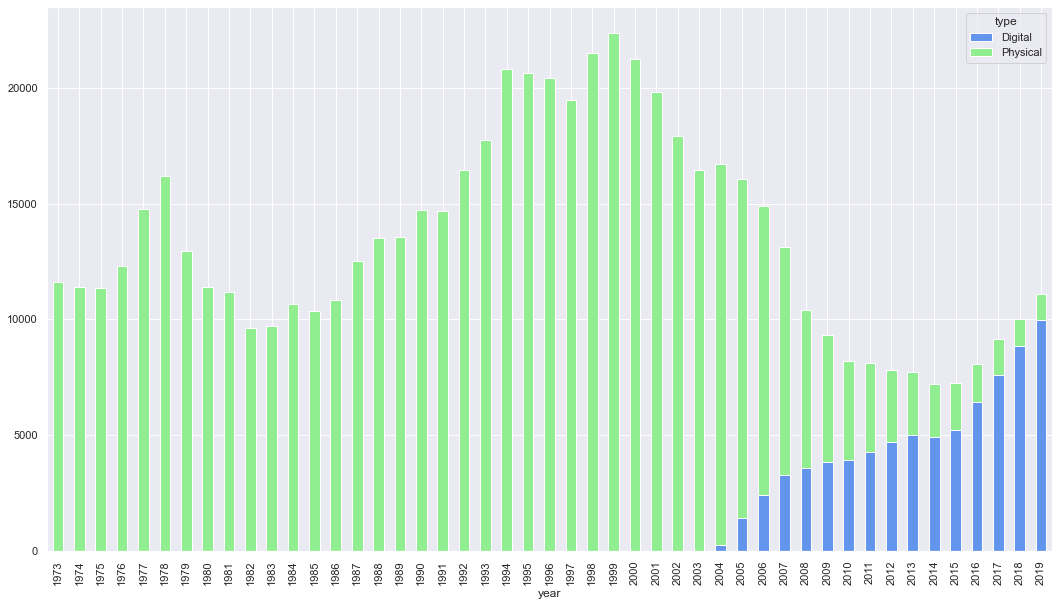

In [115]:
''' Al comprobar el gráfico, faltan muchos datos en cuando a unidades, así que 
    nuevamente utilicé el dataframe de music_revenues '''

revenues_group = music_revenues.groupby(['year', 'type'])['value_actual'].sum().unstack('type').fillna(0)
from matplotlib import cm
from itertools import cycle, islice

colors = list(islice(cycle(['#6495ED', '#90EE90']), None, len(revenues_group)))

revenues_group.plot(kind='bar', stacked=True, 
          color=colors, figsize=(18,10));


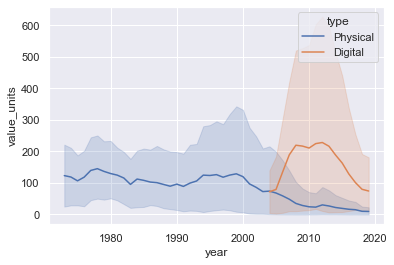

In [94]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="year", y="value_units",
             hue="type",
             data=music_units);

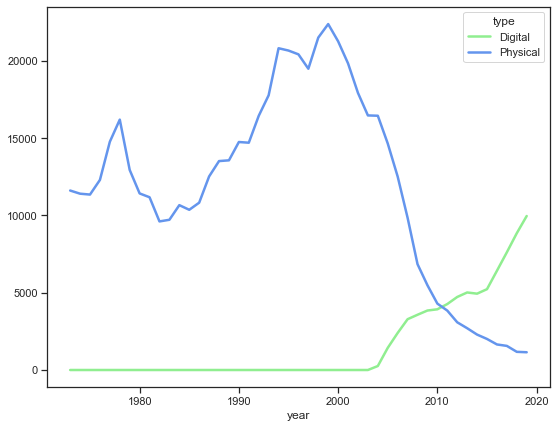

In [163]:
colors = ['#90EE90', '#6495ED']
revenues_group.plot(figsize=(9,7), color=colors, linewidth=2.5);

**Creo un gráfico similar al primero para contrastar la diferencia entre el valor ajustado a la inflación, con las unidades vendidas por formato** 

Cambia bastante el panorama.  Ya que actualemente la producción y la distribución de música, es infinitamente mayor.  Por lo tanto, el consumo en unidades se dispara.

Creando gráficos de unidades separados por Physical y Digital.

## Creando un dataset para analizar los vinilos: 

In [117]:
# me creo una copia de ambos datasets:

vinyl_values = music_revenues.copy()
vinyl_units = music_units.copy()

In [118]:
# me creo una función para poder filtrar los vinilos.

def vinyl_only(category):
    if category == 'Vinyl':
        return 1

# me creo una columna en cada dataset para filtrarlos:
vinyl_values['vinyl'] = vinyl_values['category'].apply(vinyl_only)
vinyl_units['vinyl'] = vinyl_units['category'].apply(vinyl_only)

In [138]:
# elimino los nans para quedarme sólo con los vinilos:
vinyl_values.dropna(inplace=True)
vinyl_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 258 to 435
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             94 non-null     object 
 1   year               94 non-null     int64  
 2   number_of_records  94 non-null     int64  
 3   value_actual       94 non-null     float64
 4   category           94 non-null     object 
 5   type               94 non-null     object 
 6   vinyl              94 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.9+ KB


In [119]:
vinyl_units.dropna(inplace=True)
vinyl_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 133 to 226
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             94 non-null     object 
 1   year               94 non-null     int64  
 2   number_of_records  94 non-null     int64  
 3   value_units        94 non-null     float64
 4   category           94 non-null     object 
 5   type               94 non-null     object 
 6   vinyl              94 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.9+ KB


In [120]:
# y elimino la columna de 'vinyl', 'category', y 'type' que no son necesarias:

vinyl_units.drop(vinyl_units[['type', 'category']], axis=1, inplace=True)
vinyl_values.drop(vinyl_values[['type', 'category']], axis=1, inplace=True)

In [121]:
vinyl_units.reset_index(inplace=True)
vinyl_units.drop(['index'], axis=1, inplace=True)
vinyl_units.head()

,format,year,number_of_records,value_units,vinyl
0,LP/EP,1973,1,280.0,1.0
1,LP/EP,1974,1,276.0,1.0
2,LP/EP,1975,1,257.0,1.0
3,LP/EP,1976,1,273.0,1.0
4,LP/EP,1977,1,344.0,1.0


In [122]:
vinyl_units.head()

,format,year,number_of_records,value_units,vinyl
0,LP/EP,1973,1,280.0,1.0
1,LP/EP,1974,1,276.0,1.0
2,LP/EP,1975,1,257.0,1.0
3,LP/EP,1976,1,273.0,1.0
4,LP/EP,1977,1,344.0,1.0


In [124]:
''' Creando un grupo de valores de unidades de vinilo vendidas, 
    para realizar un treemap'''

# me creo una serie con los valores agrupados por año y la suma de unidades:

group_vinyl = vinyl_units.groupby(['year', 'vinyl'])['value_units'].sum()

In [125]:
# lo pasa a dataframe:
vinyl_df = pd.DataFrame(group_vinyl)
vinyl_df.head()

,,value_units
year,vinyl,
1973,1.0,508.0
1974,1.0,480.0
1975,1.0,421.0
1976,1.0,463.0
1977,1.0,534.0


In [126]:
vinyl_df.reset_index(inplace=True)
vinyl_df.head()

,year,vinyl,value_units
0,1973,1.0,508.0
1,1974,1.0,480.0
2,1975,1.0,421.0
3,1976,1.0,463.0
4,1977,1.0,534.0


In [127]:
vinyl_df.drop(['vinyl'], axis=1, inplace=True)
vinyl_df.head()

,year,value_units
0,1973,508.0
1,1974,480.0
2,1975,421.0
3,1976,463.0
4,1977,534.0


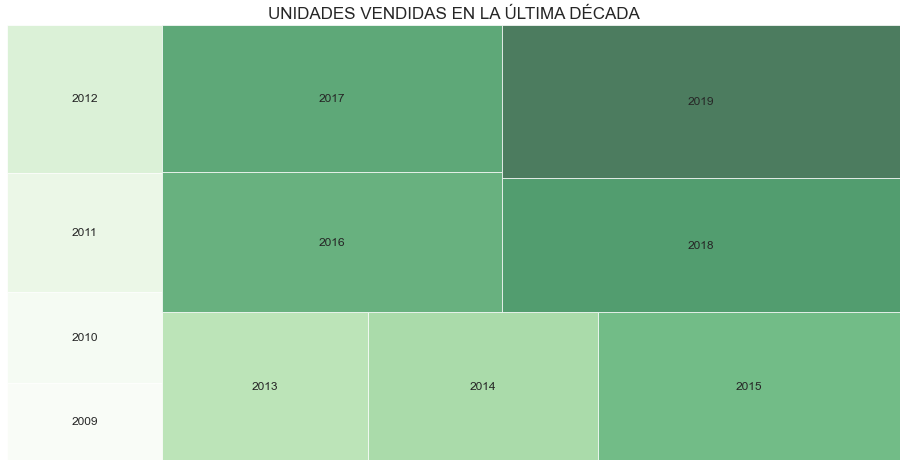

In [138]:
import matplotlib
import squarify

# voy a hacer 1 treemap de los últimos 10 años para ver el incremento de ventas:
vinyl_df_2 = vinyl_df[vinyl_df['year']>2008]


norm = matplotlib.colors.Normalize(vmin=min(vinyl_df_2.value_units), vmax=max(vinyl_df_2.value_units))
colors = [matplotlib.cm.Greens(norm(value)) for value in vinyl_df_2.value_units]


# Creamos el plot y definimos el tamaño.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 8)

# Usamos squarify para los datos, poner un título y especifcar diseño.
squarify.plot(label=vinyl_df_2.year, sizes=vinyl_df_2.value_units, color = colors, alpha=.7)
plt.title("UNIDADES VENDIDAS EN LA ÚLTIMA DÉCADA",fontsize=17,fontweight="light")

# Quitar axes
plt.axis('off')
plt.show()

In [139]:
# exportando a png:
plt.savefig('vinyl_sales.png')


<Figure size 432x288 with 0 Axes>

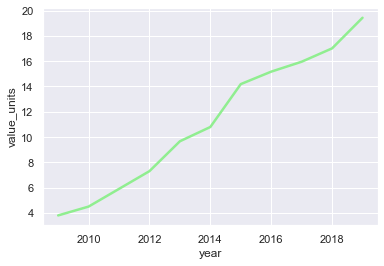

In [177]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="year", y="value_units",
             data=vinyl_df_2,
             color='lightgreen', linewidth=2.5);

#### Suma de ingresos con el valor ajustado por 'Categoría' de formato.

In [17]:
# Sacando la media de ventas de 'Cassettes & Tapes'
group_cassette = music_revenues.copy()
group_cassette.head()

,format,year,number_of_records,value_actual,category,type
0,8 - Track,1973,1,2815.681824,Cassettes & Tapes,Physical
1,8 - Track,1974,1,2848.008609,Cassettes & Tapes,Physical
2,8 - Track,1975,1,2770.409498,Cassettes & Tapes,Physical
3,8 - Track,1976,1,3047.215772,Cassettes & Tapes,Physical
4,8 - Track,1977,1,3421.416287,Cassettes & Tapes,Physical


In [18]:
group_cassette = group_cassette[group_cassette['category']=='Cassettes & Tapes']

In [19]:
group_cassette.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 314
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             66 non-null     object 
 1   year               66 non-null     int64  
 2   number_of_records  66 non-null     int64  
 3   value_actual       66 non-null     float64
 4   category           66 non-null     object 
 5   type               66 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 3.6+ KB


In [21]:
group_cassette['value_actual'].mean()

1975.1494912803937

In [23]:
# Sacando la media de ventas de 'CD & Single'
group_cd = music_revenues.copy()
group_cd.head()

,format,year,number_of_records,value_actual,category,type
0,8 - Track,1973,1,2815.681824,Cassettes & Tapes,Physical
1,8 - Track,1974,1,2848.008609,Cassettes & Tapes,Physical
2,8 - Track,1975,1,2770.409498,Cassettes & Tapes,Physical
3,8 - Track,1976,1,3047.215772,Cassettes & Tapes,Physical
4,8 - Track,1977,1,3421.416287,Cassettes & Tapes,Physical


In [24]:
group_cd = group_cd[group_cd['category']=='CD & Singles']
group_cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 10 to 361
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             86 non-null     object 
 1   year               86 non-null     int64  
 2   number_of_records  86 non-null     int64  
 3   value_actual       86 non-null     float64
 4   category           86 non-null     object 
 5   type               86 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.7+ KB


In [25]:
group_cd['value_actual'].mean()

3582.2349492797557

In [26]:
# sacando la media de ventas de 'LP/EP'
group_vinyl = music_revenues.copy()
group_vinyl.head()

,format,year,number_of_records,value_actual,category,type
0,8 - Track,1973,1,2815.681824,Cassettes & Tapes,Physical
1,8 - Track,1974,1,2848.008609,Cassettes & Tapes,Physical
2,8 - Track,1975,1,2770.409498,Cassettes & Tapes,Physical
3,8 - Track,1976,1,3047.215772,Cassettes & Tapes,Physical
4,8 - Track,1977,1,3421.416287,Cassettes & Tapes,Physical


In [28]:
group_vinyl = group_vinyl[group_vinyl['category']=='Vinyl']
group_vinyl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 212 to 435
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             94 non-null     object 
 1   year               94 non-null     int64  
 2   number_of_records  94 non-null     int64  
 3   value_actual       94 non-null     float64
 4   category           94 non-null     object 
 5   type               94 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.1+ KB


In [29]:
group_vinyl['value_actual'].mean()

1158.1173396378404

In [30]:
# todos los demás formatos:
group_other_ph = music_revenues.copy()
group_other_ph.head()

,format,year,number_of_records,value_actual,category,type
0,8 - Track,1973,1,2815.681824,Cassettes & Tapes,Physical
1,8 - Track,1974,1,2848.008609,Cassettes & Tapes,Physical
2,8 - Track,1975,1,2770.409498,Cassettes & Tapes,Physical
3,8 - Track,1976,1,3047.215772,Cassettes & Tapes,Physical
4,8 - Track,1977,1,3421.416287,Cassettes & Tapes,Physical


In [39]:
group_other_ph = group_other_ph[group_other_ph['category']=='DVDs']
group_other_ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 131 to 293
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             50 non-null     object 
 1   year               50 non-null     int64  
 2   number_of_records  50 non-null     int64  
 3   value_actual       50 non-null     float64
 4   category           50 non-null     object 
 5   type               50 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ KB


In [40]:
group_other_ph['value_actual'].mean()

214.0803223818